# Importing Requried Dependencies

In [376]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Import

In [377]:
car_data = pd.read_csv('car data.csv')

# Data Preprocessing

In [378]:
# First five rows
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [379]:
# Last five rows
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [380]:
# Statistical Details about dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [381]:
# Missing values

car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [382]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [383]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [384]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [385]:
car_data.shape

(301, 9)

# Encoding categorical Valeus

In [386]:
# Encoding "Fuel Type " column
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding "Seller Type" column
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encode "Transmission" column
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\abbas\AppData\Local\Temp\ipykernel_18640\662542879.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\abbas\AppData\Local\Temp\ipykernel_18640\662542879.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\abbas\AppData\Local\Temp\ipykernel_18640\662542879.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a f

In [387]:
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


# Splitting Data into Feature and Target

In [388]:
X = car_data.drop(['Selling_Price', 'Car_Name'], axis=1)
Y = car_data['Selling_Price']

In [389]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [390]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Test data

In [391]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Training

### 1. Liner Regression

In [392]:
LR_model = LinearRegression()

In [393]:
LR_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Model Evaluation

In [394]:
# Prediction on training data

train_data_prediciton = LR_model.predict(X_train)

# Rscore

error_score = r2_score(Y_train, train_data_prediciton)
print(error_score)

0.8799451660493708


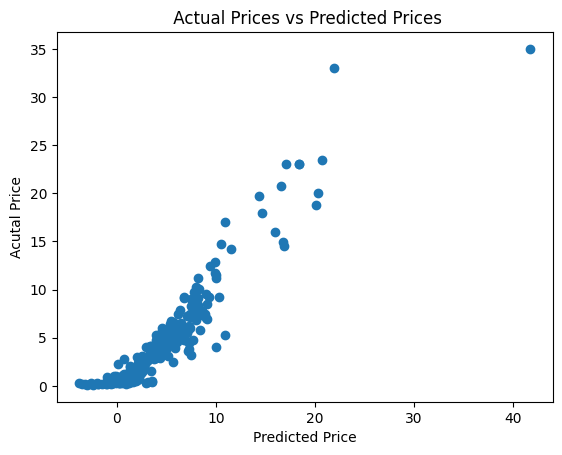

In [395]:
# Visualization on actual vs predicted price

plt.scatter(train_data_prediciton, Y_train)
plt.xlabel("Predicted Price")
plt.ylabel("Acutal Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [396]:
# Prediction on Test data

test_data_prediction = LR_model.predict(X_test)

# R Score

error_score = r2_score(Y_test, test_data_prediction)
print(error_score)

0.8365766715026374


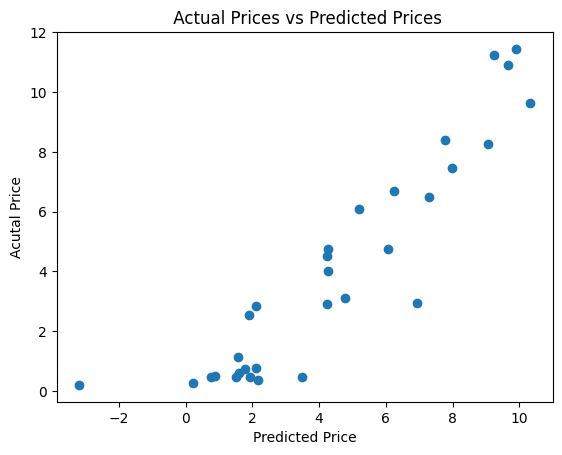

In [397]:
# Visualization on actual vs predicted
plt.scatter(test_data_prediction, Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Acutal Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### 2. Lasso Regression

In [398]:
lasso_model = Lasso()

In [399]:
lasso_model.fit(X_train, Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


#### Model Evaluation

In [400]:
# Prediction on train data

train_data_prediciton = lasso_model.predict(X_train)

# R Squar error

error_score = r2_score(Y_train, train_data_prediciton)
print(error_score)

0.8427856123435794


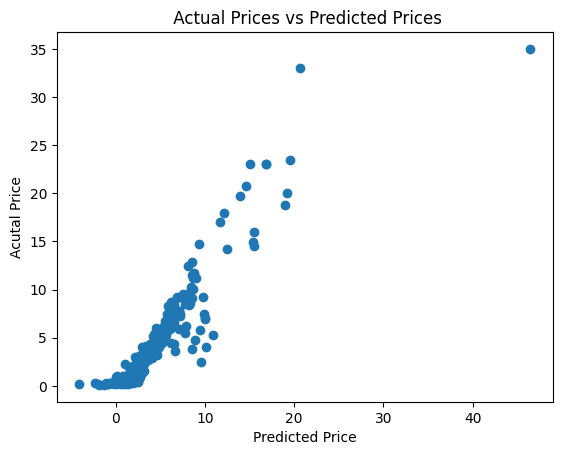

In [401]:
# Visualization on actual vs predicted price

plt.scatter(train_data_prediciton, Y_train)
plt.xlabel("Predicted Price")
plt.ylabel("Acutal Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [402]:
# Prediction on test data

test_data_prediction = lasso_model.predict(X_test)

# R square error

error_score = r2_score(Y_test, test_data_prediction)
print(error_score)

0.8709167941173195


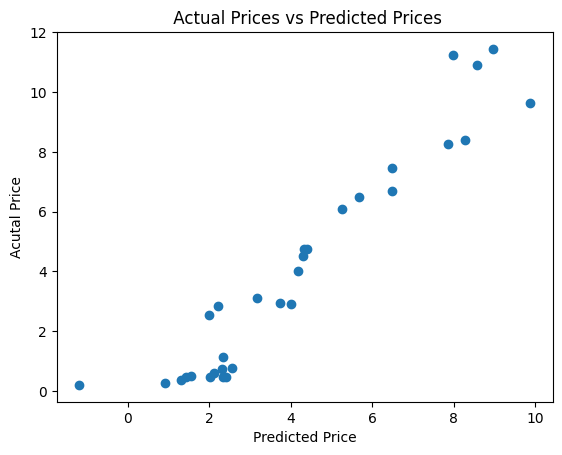

In [403]:
# Visualization on actual vs predicted
plt.scatter(test_data_prediction, Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Acutal Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()